In [58]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.misc as misc
from PIL import Image

In [59]:
# Loading Images
img_left = np.asarray(Image.open('HW1-left-gray.png').convert('L')).astype(np.float64)
img_right = np.asarray(Image.open('HW1-right-gray.png').convert('L')).astype(np.float64)

img_left = img_left/255
img_right = img_right/255

n,m = img_left.shape[0],img_left.shape[1]

In [60]:
# Using same notations as used in reference:
k = 1/5
sigma = 0.2
delta = 0.1
gamma = 0.1  

In [61]:
## Functions as said in reference....
# dataC function
def get_dataC_info(ds, sigma, i, j, img_left, img_right):
#     if(i < 0 or i+ds > n):
#         return 0
#     else:
#         a = (-1/2)*(img_left[i, j] - img_right[i+ds, j]**2)*(1/sigma**2)
#         p = np.exp(a)
#         return 
    if i>=0 and j>=0 and i<n and j<m and i+ds<n and i+ds>=0:
##         print(i,j)
###        print(ds,sigma)
        a = (-1/2)*(img_left[i, j] - img_right[i+ds, j]**2)*(1/sigma**2)
        p = np.exp(a)
#         print(a)
        return p
    else:
        return 0

# Calculating smooth cost:
def smoothC_info(ds, dt, gamma, delta):
    a = min((ds-dt)**2, delta**2)
#     print(gamma)
    b = a*(-1/2)*(1/gamma**2)
    return np.exp(b)

In [62]:
# DP implementation:

# Function to get all neighbours of (i,j)
def neighbours(i,j):
    temp = [(i-1,j),(i+1,j),(i,j-1),(i,j+1)]
    return [ (a,b) for (a,b) in temp if (0<=a and a<n and 0<=b and b<m) ]


## main part from here ##
def initial_(ds, sigma, i, j, img_left, img_right, delta, gamma):
    temp = 0
    for dt in range(10):
##        print(type(smoothC_info(ds, dt, gamma, delta)))
#         print(type( get_dataC_info(dt, sigma, i, j, img_left, img_right)))
        temp +=  smoothC_info(ds, dt, gamma, delta) * get_dataC_info(dt, sigma, i, j, img_left, img_right)
#         print(dt," : ",temp)
    return temp

#Not
# def neighbours_(i1,j1,i2,j2):
#     n1 =  neighbours(i1,j1)
#     n2 = neighbours(i2,j2)
    
#     ans = []
#     for (x,y) in n1:
#         if (x,y) not in n2 and (x,y) != (i2,j2):
#             ans.append((x,y))

#     return ans

# Run over all neighbours to get total
def calculate_L(ds, i, j, img_left, img_right, delta, gamma):
    temp = 1
    for (x,y) in neighbours(i,j):
        temp *= initial_(ds,sigma,x,y,img_left,img_right,delta,gamma)
###   print(temp)
    return temp

In [63]:
#### defining....
beliefs_prop = np.zeros(10) # belief
dispar = np.zeros((n, m)) # answer matrix

In [64]:
# def normalise(msg):
#     msg = msg / np.sum(msg)

## Final Run
for i in range(n):
    for j in range(m):
        for z in range(10):
            # doing product with:
            beliefs_prop[z] = 1
#             print(beliefs_prop[z])
            beliefs_prop[z] *= get_dataC_info(z, sigma, i, j, img_left, img_right)
            beliefs_prop[z] *= k
##             print(beliefs_prop[z],k)
###             if (beliefs_prop[z] == 0):
#                 print(i,j,z)
#                 print(get_dataC_info(z, sigma, i, j, img_left, img_right))
#                 print(k)
            beliefs_prop[z] *= calculate_L(z, i, j, img_left, img_right, delta, gamma)
#             if (beliefs_prop[z] < 0):
#                 print(i,j,z)
#                 print(calculate_L(z, i, j, img_left, img_right, delta, gamma))
#                 i = n
#                 j = m
#                 break
###             if(i > 1):
##                print(i,j,z)
#                 break:
        dispar[i, j] = np.argmax(beliefs_prop)

FINAL_IMAGE = 25.5*dispar
print(dispar)

[[9. 9. 9. ... 0. 0. 0.]
 [9. 9. 9. ... 0. 0. 0.]
 [8. 8. 8. ... 0. 0. 0.]
 ...
 [2. 2. 2. ... 1. 2. 2.]
 [1. 1. 1. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


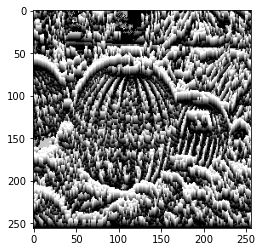

In [65]:
plt.imshow(FINAL_IMAGE,cmap='gray')

In [ ]:
## Report:
# to even get better results we need to tune to better values of gamma delta.
# To get faster results for experimenting we can downscale the images as we did representation learning scenrio


In [ ]:
# dimg = Image.fromarray(dispar).convert('L')
# dimg.save('output.png')

